In [1]:
#Websites I used to help clean up
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
#https://www.statology.org/pandas-combine-two-columns/
#https://www.geeksforgeeks.org/replace-nan-with-blank-or-empty-string-in-pandas/
#https://www.geeksforgeeks.org/how-to-convert-integers-to-floats-in-pandas-dataframe/
#https://saturncloud.io/blog/how-to-sum-two-columns-in-a-pandas-dataframe/

In [2]:
#import libraries
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read file
injury_file = Path("injury_data.csv")
injury_df = pd.read_csv(injury_file)

In [4]:
#make a copy 
ak_injury_df=injury_df.copy()

In [5]:
#Adding relevant columns and removing non-relevant columns
ak_injury_df=ak_injury_df.drop(['Height', 'Weight'], axis=1)
ak_injury_df['Total Days Missed']= ak_injury_df['Total Playoff Games Missed']+ak_injury_df['Total  Regular Season Games Missed']
ak_injury_df['Total Regular Season Games Missed']= ak_injury_df['Total  Regular Season Games Missed']

In [6]:
#cleaning up data frame for easy reading/easy analysis
ak_injury_df = ak_injury_df[['Playerid', 'Season', 'Part Specific', 'Injury Type', 'Surgery?', 'Time of Year', 'Total Regular Season Games Missed', 'Total Playoff Games Missed', 'Body Part', 'Side', 'Total Days Missed']].fillna('')
ak_injury_df=ak_injury_df[['Playerid', 'Season', 'Side', 'Body Part', 'Part Specific', 'Injury Type', 'Surgery?', 'Time of Year', 'Total Regular Season Games Missed', 'Total Playoff Games Missed', 'Total Days Missed']]
ak_injury_df['Total Playoff Games Missed'] = ak_injury_df['Total Playoff Games Missed'].astype(float) 
ak_injury_df['Total Regular Season Games Missed'] = pd.to_numeric(ak_injury_df['Total Regular Season Games Missed'], errors='coerce')
ak_injury_df['Total Days Missed']=pd.to_numeric(ak_injury_df['Total Days Missed'], errors= 'coerce')

#There is one spasm that was marked blank for if they got surgery- I replaced it with a No (DATA ASSUMPTION)
ak_injury_df['Surgery?'] = ak_injury_df['Surgery?'].replace({'No ': 'No',
                                                            '':'No',
                                                            ' ': 'No'})

ak_injury_df.head()

,Playerid,Season,Side,Body Part,Part Specific,Injury Type,Surgery?,Time of Year,Total Regular Season Games Missed,Total Playoff Games Missed,Total Days Missed
0,Player1,2005-06,,head,jaw,fracture,Yes,Regular season,10.0,0.0,10.0
1,Player1,2006-07,,,,illness,No,Regular season,1.0,0.0,1.0
2,Player1,2006-07,R,knee,,soreness,No,Regular season,1.0,0.0,1.0
3,Player1,2007-08,R,knee,,effusion,No,Regular season,10.0,0.0,10.0
4,Player1,2007-08,R,knee,,debridement,Yes,Regular season,65.0,0.0,65.0


Injured Body Parts vs. Number of Days Missed

In [7]:
#Days Missed Based on Body Part
ak_body_part_days_missed_counts=ak_injury_df.groupby('Body Part')['Total Days Missed'].count()
ak_body_part_days_missed_max=ak_injury_df.groupby('Body Part')['Total Days Missed'].max()
ak_body_part_days_missed_min=ak_injury_df.groupby('Body Part')['Total Days Missed'].min()
ak_body_part_days_missed_mean=ak_injury_df.groupby('Body Part')['Total Days Missed'].mean()
ak_body_part_days_missed_median=ak_injury_df.groupby('Body Part')['Total Days Missed'].median()

ak_body_part_summary=pd.DataFrame({"Count": ak_body_part_days_missed_counts,
                                   "Minimum": ak_body_part_days_missed_min,
                                   "Maximum": ak_body_part_days_missed_max,
                                   "Mean": ak_body_part_days_missed_mean,
                                   "Median": ak_body_part_days_missed_median
                                  })

ak_body_part_summary

,Count,Minimum,Maximum,Mean,Median
Body Part,,,,,
,4097,0.0,52.0,1.352697,1.0
abdominal,201,0.0,46.0,4.925373,1.0
ankle,4601,0.0,87.0,2.557053,1.0
arm,85,0.0,52.0,2.529412,0.0
back,2133,0.0,82.0,2.666198,1.0
body,30,0.0,1.0,0.300000,0.0
chest,84,0.0,82.0,7.273810,1.0
ear,1,0.0,0.0,0.000000,0.0
elbow,422,0.0,43.0,2.372038,0.0


Text(0.5, 1.0, 'Boxplots of Games Missed by Body Part Injured')

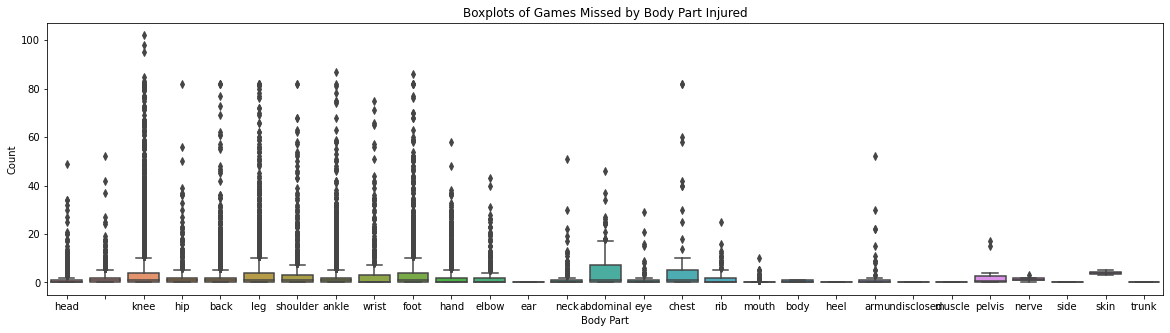

In [8]:
###Injury Part by Number of Games Missed

#How to make multiple boxplots
fig, ax = plt.subplots(figsize=(20, 5))

sns.boxplot(x = 'Body Part', 
            y = 'Total Days Missed', 
            data = ak_injury_df)

ax.set_xlabel('Body Part')
ax.set_ylabel('Count')
ax.set_title('Boxplots of Games Missed by Body Part Injured')

Injuried Body Part vs. Number of Surgeries

In [9]:
#Days Missed Based on Body Part
ak_surgery_days_missed_counts=ak_injury_df.groupby('Body Part')['Surgery?'].value_counts()

#DataFrame from ChatGPT
ak_injury_df.pivot_table(index = 'Body Part', 
                   columns = 'Surgery?', 
                   values = 'Total Days Missed', 
                   aggfunc = ['count', 'max', 'min', 'median', 'mean']).round(1)

count          max         min       median       mean      
Surgery?         No    Yes    No    Yes   No   Yes     No   Yes   No   Yes
Body Part                                                                 
             4068.0   29.0  52.0   37.0  0.0   0.0    1.0   7.0  1.3   7.9
abdominal     177.0   24.0  24.0   46.0  0.0   0.0    1.0  11.5  3.5  15.1
ankle        4541.0   60.0  58.0   87.0  0.0   0.0    1.0  22.5  2.2  29.0
arm            83.0    2.0  30.0   52.0  0.0  22.0    0.0  37.0  1.7  37.0
back         2101.0   32.0  73.0   82.0  0.0   0.0    1.0  31.5  2.1  37.2
body           30.0    NaN   1.0    NaN  0.0   NaN    0.0   NaN  0.3   NaN
chest          70.0   14.0  82.0   82.0  0.0   0.0    1.0   8.0  4.8  19.6
ear             1.0    NaN   0.0    NaN  0.0   NaN    0.0   NaN  0.0   NaN
elbow         410.0   12.0  43.0   26.0  0.0   0.0    0.0  10.0  2.1  10.8
eye           130.0    6.0  15.0   29.0  0.0   1.0    0.0  12.5  0.6  13.2
foot         1670.0   97.0  82.0   86.0  0.0   0.0    1.0  23.0  3.4  28.4
hand         1207.0  123.0  37.0   58.0  0.0   0.0    0.0  15.0  1.8  16.0
head         1152.0   70.0  49.0   34.0  0.0   0.0    0.0   1.0  1.2   4.1
heel            1.0    NaN   0.0    NaN  0.0   NaN    0.0   NaN  0.0   NaN
hip           745.0   23.0  39.0   82.0  0.0   0.0    1.0  11.0  1.7  18.3
knee         3655.0  385.0  82.0  102.0  0.0   0.0    1.0  24.0  3.1  29.7
leg          4311.0   82.0  82.0   82.0  0.0   0.0    1.0  24.5  3.0  30.8
mouth         125.0   42.0   5.0   10.0  0.0   0.0    0.0   0.5  0.2   1.0
muscle          2.0    NaN   0.0    NaN  0.0   NaN    0.0   NaN  0.0   NaN
neck          270.0    1.0  30.0   51.0  0.0  51.0    0.0  51.0  1.4  51.0
nerve           6.0    NaN   3.0    NaN  0.0   NaN    1.0   NaN  1.3   NaN
pelvis         12.0    NaN  17.0    NaN  0.0   NaN    0.5   NaN  3.4   NaN
rib           184.0    NaN  25.0    NaN  0.0   NaN    0.0   NaN  1.7   NaN
shoulder      927.0   57.0  82.0   82.0  0.0   0.0    1.0  23.0  2.6  24.9
side            2.0    NaN   0.0    NaN  0.0   NaN    0.0   NaN  0.0   NaN
skin            2.0    NaN   5.0    NaN  3.0   NaN    4.0   NaN  4.0   NaN
trunk           1.0    NaN   0.0    NaN  0.0   NaN    0.0   NaN  0.0   NaN
undisclosed     4.0    NaN   0.0    NaN  0.0   NaN    0.0   NaN  0.0   NaN
wrist         553.0   52.0  42.0   75.0  0.0   0.0    0.0  23.0  2.1  26.1

Text(0.5, 1.0, 'Number of Surgeries by Body Part')

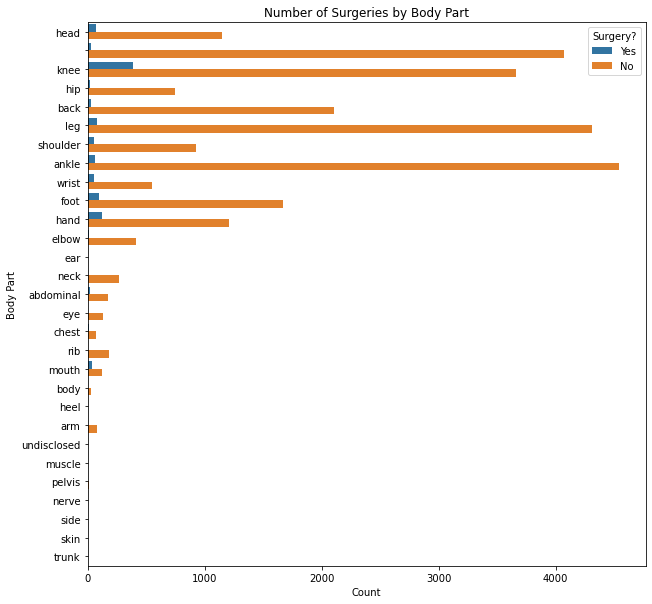

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))


sns.countplot(y = 'Body Part', 
              hue = 'Surgery?', 
              data = ak_injury_df)

sns.set_palette("bright")
ax.set_ylabel('Body Part')
ax.set_xlabel('Count')
ax.set_title('Number of Surgeries by Body Part')